In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X, y, features

def visualize(X, y, features):
    plt.figure(figsize=(20, 20))
    feature_count = X.shape[1]

    for i in range(feature_count):
        x = plt.subplot(5, 3, i + 1)
        plt.scatter(x=X[:,i], y=y)
        x.set_title(features[i])
    plt.tight_layout()
    plt.show()

def fit_regression(X, Y, add_bias):
    # Remember to use np.linalg.solve instead of inverting!
    if add_bias:
        X = np.append(np.ones([1,X.shape[0]]).transpose(), X, axis=1)
    a = X.transpose().dot(X)
    b = X.transpose().dot(Y)
    coefs = np.linalg.solve(a, b)
    return coefs

def predict(X, w):
    return X.dot(w.drop("Bias")) + w['Bias']

def get_sse(predicted, actual):
    return sum((predicted - actual) ** 2)

def get_sst(actual):
    return sum((actual - actual.mean())**2)

def get_adj_rsquared(predicted, actual, num_features):
    n = len(actual)
    sse = get_sse(predicted, actual)
    sst = get_sst(actual)
    return 1 - ((sse / (n - num_features)) / (sst / n))


def get_mse(predicted, actual):
    return get_sse(predicted, actual) / len(actual)

def get_mape(predicted, actual):
    return abs((actual - predicted) / actual).mean()

In [3]:
# loading, normalizing and splitting the data
X, y, features = load_data()
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.30)


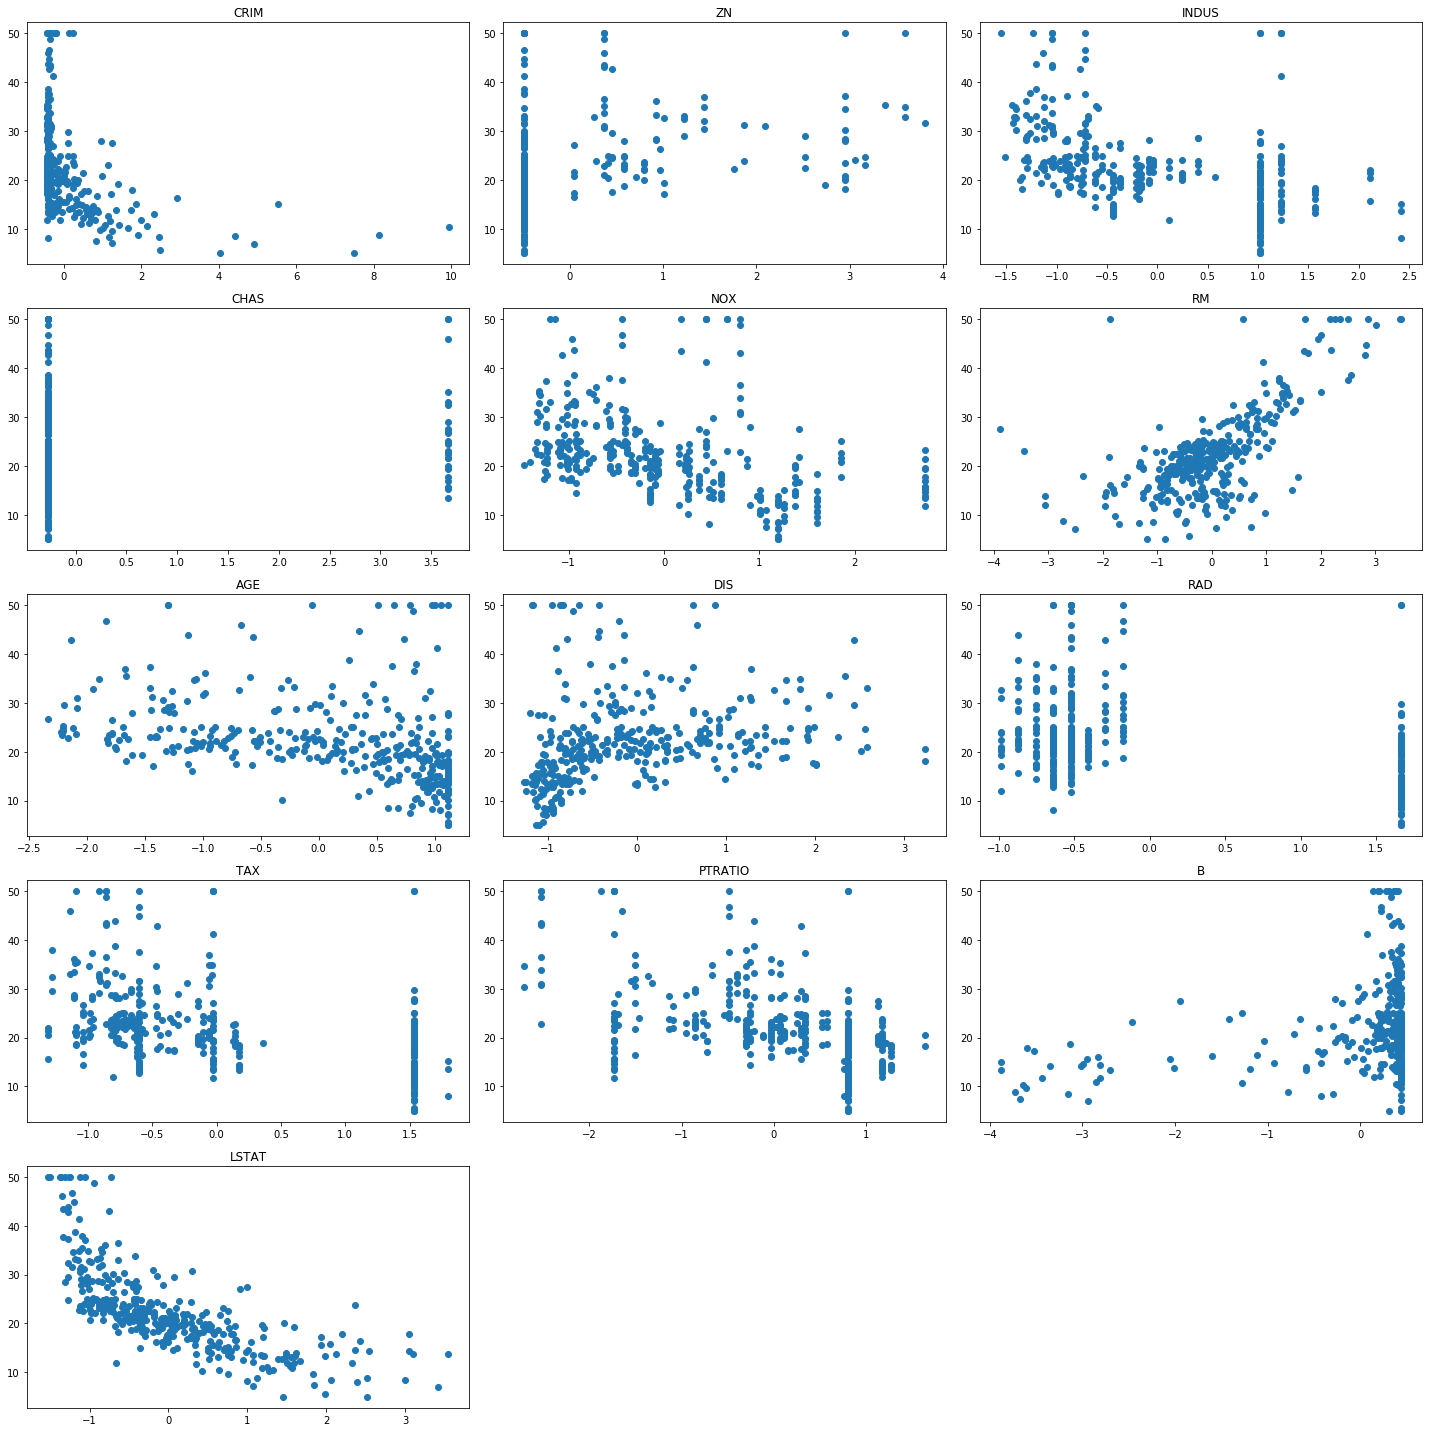

In [4]:
visualize(X_train, y_train, features)

In [5]:
# get the coefficients
coef_names = ["Bias"] + list(features)

coef_weights = pd.Series(data=fit_regression(X_train, y_train, add_bias=True), 
                         index=coef_names)
coef_weights

Bias       22.445605
CRIM       -1.073167
ZN          1.038115
INDUS       0.358712
CHAS        0.472882
NOX        -1.890001
RM          2.595717
AGE        -0.225372
DIS        -2.866893
RAD         2.764565
TAX        -2.305807
PTRATIO    -2.286942
B           0.685739
LSTAT      -3.256074
dtype: float64

In [6]:
# Evaluate the algorithm's performance
predicted_y = predict(X_test, coef_weights)
rsqr = round(get_adj_rsquared(predicted_y, y_test, 13)*100, 2)
mape = round(get_mape(predicted_y, y_test) * 100, 2)
mse = get_mse(predicted_y, y_test)
print("An R-squared result indicates that {0}% of the variation in prices is explained by our model".format(rsqr))
print("On average, the difference between what we predict and the actual price is {0}% ".format(mape))
print("On average, the difference between what we predict and the actual price is ${0}".format(np.sqrt(mse)))

An R-squared result indicates that 72.65% of the variation in prices is explained by our model
On average, the difference between what we predict and the actual price is 15.39% 
On average, the difference between what we predict and the actual price is $5.0427463531768195
